In [1]:
# Usecase- Mall Customer Data Segmentation
# The owner want to figure out if we can create any strategy to increase the business of the mall

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
#Perform EDA

In [7]:
# Step1. Ensure All preprocessing is done if required
#Note: Initially only consider numeric columns and not string columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#Currently I am targetting only three columns viz.
#Age                       200 non-null int64
#Annual Income (k$)        200 non-null int64
#Spending Score (1-100)    200 non-null int64
#Perform EDA on these 3 columns

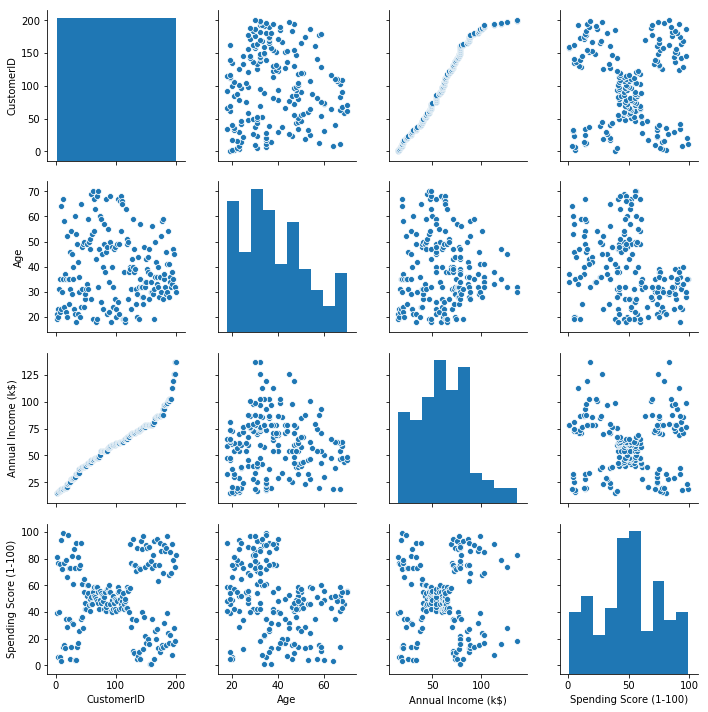

In [10]:
sns.pairplot(data)

In [11]:
#The above Visual EDA informs there exists strong cluster relationship between
# 1. Annual Income v/s Spending Score
# 2. Age v/s Spending Score

In [12]:
#Lets analyse # 1. Annual Income v/s Spending Score Hypothesis
# Assumed K  = 5 based on Visual EDA

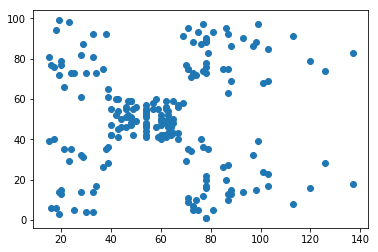

In [13]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

In [15]:
features = data.iloc[:,[3,4]].values

In [14]:
#Use Kmeans to verify my Hypothesis

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

In [16]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
#Get Cluster from the model and visualize the same
group = model.predict(features)

In [20]:
dfResult = pd.DataFrame(features, columns=['Annual Income', 'SS'])
dfResult.head()

,Annual Income,SS
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
dfResult['group'] = group
dfResult.head()

,Annual Income,SS,group
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


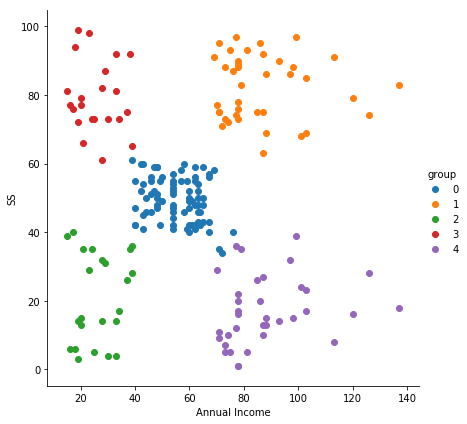

In [22]:
sns.FacetGrid(dfResult, hue='group',size=6)\
.map(plt.scatter, 'Annual Income', 'SS') \
.add_legend()

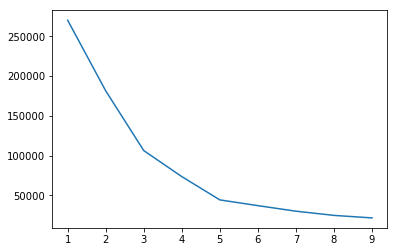

In [24]:
#Verify Whether the value of K is the optimal value or not
# We will use Elbow Method
# Error Function: Within Cluster Sum of Squares

wcss = []

for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(features)
    wcss.append(model.inertia_)

plt.plot(range(1,10), wcss)

In [ ]:
#Age v/s Spending Score

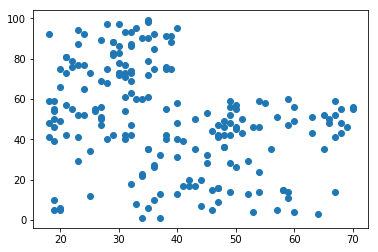

In [25]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])

In [34]:
features2 = data.iloc[:,[2,4]].values

from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=4)

model2.fit(features2)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
group1 = model2.predict(features2)
dfResult2 = pd.DataFrame(features2, columns=['Age', 'SS'])
dfResult2.head()

,Age,SS
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [36]:
dfResult2['group']=group1
dfResult2.head()

,Age,SS,group
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


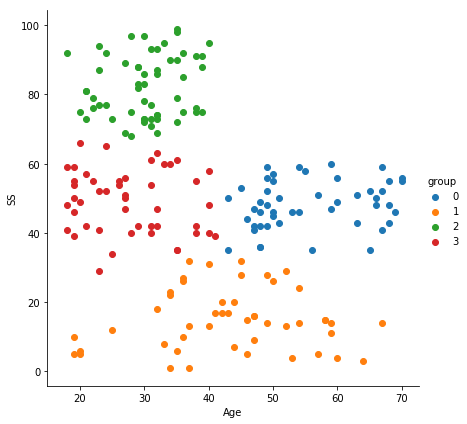

In [37]:
sns.FacetGrid(dfResult2, hue='group',size=6)\
.map(plt.scatter, 'Age', 'SS') \
.add_legend()

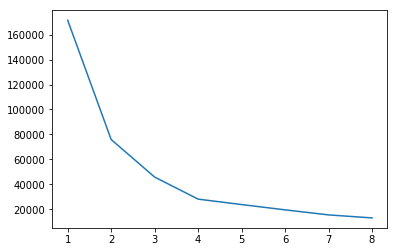

In [33]:
#Verify Whether the value of K is the optimal value or not
# We will use Elbow Method
# Error Function: Within Cluster Sum of Squares

wcss = []

for i in range(1,9):
    model = KMeans(n_clusters=i)
    model.fit(features2)
    wcss.append(model.inertia_)

plt.plot(range(1,9), wcss)